# Project: Investigate a TMDb Movie Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue,cast,release year.

> Brief Description of each column in the dataset

> **1.id** - Unique id's for each row

> **2.imdb_id** - System generated unique id

> **3.popularity** - popularity score 

> **4.budget** - budget in dollars

> **5.revenue** - revenue in dollars

> **6.original_title** - Movie title

> **7.cast** - cast performed in movie

> **8.homepage** - website link of movie

> **9.director** - director name

> **10.tagline** - tagline of movie

> **11.keywords** - words used to give significant idea

> **12.overview** - general review of movie

> **13.runtime** - movie duration in seconds

> **14.genres** - categories of movie

> **15.production_companies** - company name which manages a movie process from start to finish

> **16.release_date** - movie releasing date

> **17.vote_count** - votes given by viewers

> **18.vote_average** - average votes given by viewers

> **19.release_year** - movie releasing year

> **20.budget_adj**-budget in 2010 dollars,accounting for inflation

> **21.revenue_adj** -revenue in 2010 dollars,accounting for inflation

**Questions that I planned on exploring over the course of the report.**

<ul>
    
<li><a href="#q1">**1.What kind of  movie genres are made the most?**</a></li>

<li><a href="#q2">**2.Which genres are most popular from year to year?**</a></li>

<li><a href="#q3">**3.In which year most of the movies released?**</a></li>

<li><a href="#q4">**4.What kinds of properties are associated with movies that have high revenues.**</a></li>

<li><a href="#q5">**5. High Gross profit movies from year to year**</a></li>

<li><a href="#q6">**6. High Budget Movies from year to year.**</a></li>

<li><a href="#q7">**7.What are the months when most of the movies released?**</a></li>

<li><a href="#q8">**8.As per popularity score which actor / actress is most famous?**</a></li>

<li><a href="#q9">**9.As per popularity score which movie is most famous?**</a></li>

<li><a href="#q10">**10.As per Average vote score which movie is most famous?**</a></li>

<li><a href="#q11">**11.As per Average vote score which Actor/Actress is most famous?**</a></li>

<li><a href="#q12">**12.Movies which have earned highest revenue.**</a></li>

<li><a href="#q13">**13.Most Frequent Runtime of movies**</a></li>

<li><a href="#q14">**14.Most famous action directors**</a></li>

<li><a href="#q15">**15. Most famous Actors in Action genre.**</a></li>

<li><a href="#q16">**16.Which production companies have made most of the movies**</a></li>

<li><a href="#q17">**17.Most frequent Keywords used in every genres.**</a></li>

<li><a href="#q18">**18.Older or newer movies get more popularity score**</a></li>

<li><a href="#q19">**19.Visualization**</a></li>
</ul>

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

<a id='wrangling'></a>
## Data Wrangling

In [2]:
#Read TMDb movie csv file
tmdb_movies = pd.read_csv('tmdb-movies.csv')
tmdb_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
tmdb_movies.shape

(10866, 21)

### Let's get intuition of our data by checking its types,null values,duplicates.

In [4]:
tmdb_movies.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

### We have to convert release_date column to datetime as it is in object type.

In [3]:
tmdb_movies['release_date'] = pd.to_datetime(tmdb_movies['release_date'])

### Confirm if changes are done as we want it tobe.

In [6]:
tmdb_movies.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

### Let's get release month and weekday from release_date column

In [4]:
tmdb_movies['release_month'] = tmdb_movies['release_date'].dt.month
tmdb_movies['release_day'] = tmdb_movies['release_date'].dt.weekday_name

In [8]:
tmdb_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07,6.827259
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08,3.441802
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,1.000000
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,4.000000
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,7.000000
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07,10.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,12.000000


<a id='cleaning'></a>
## Data Cleaning 

>## Dropping Columns:
>#### I have collected month, weekday from release_date.that means release_date column does not contain any information which we dont have with us.
>#### imdb_id column contains some system generated numbers which are not of our use much.
>#### Similarly homepage data is also not very useful.

In [5]:
tmdb_movies.drop(labels = ['imdb_id','homepage','release_date'],axis =1,inplace =True)

In [10]:
tmdb_movies.shape

(10866, 20)

### Let us move forward to check if our data contains some duplicates & null values

In [6]:
sum(tmdb_movies.duplicated())

1

In [7]:
tmdb_movies.drop_duplicates(keep= 'first',inplace = True)

In [14]:
total = tmdb_movies.isnull().sum().sort_values(ascending = False)
percent = ((tmdb_movies.isnull().sum() / tmdb_movies.shape[0])*100).sort_values(ascending = False)
pd.concat([total,percent],axis = 1,keys = ['total','percent'])

,total,percent
tagline,2824,25.991717
keywords,1493,13.741371
production_companies,1030,9.479982
cast,76,0.699494
director,44,0.404970
genres,23,0.211689
overview,4,0.036815
popularity,0,0.000000
budget,0,0.000000
revenue,0,0.000000


In [15]:
tmdb_movies.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
release_month              0
release_day                0
dtype: int64

### It is better to drop null values.

In [16]:
tmdb_movies.dropna(how = 'any',inplace = True)

In [17]:
tmdb_movies.shape

(7031, 20)

### Checking if our dataset contains runtime of zero or less than zero 

In [18]:
is_runtime_zero = tmdb_movies['runtime'] == 0
tmdb_movies[is_runtime_zero].shape , tmdb_movies[is_runtime_zero].index.values

((3, 20), array([ 334, 1289, 1293], dtype=int64))

In [19]:
tmdb_movies[is_runtime_zero]

,id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_day
334,361931,0.357654,0,0,Ronaldo,Cristiano Ronaldo,Anthony Wonke,Astonishing. Intimate. Definitive.,biography|soccer player,Filmed over 14 months with unprecedented acces...,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",80,6.5,2015,0.000000e+00,0.0,11,Monday
1289,286372,0.037459,3250000,0,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,Michael G. Bartlett,No kids allowed,kidnapping|brutality|violence|teenager|discovery,A teenage boy discovers the perpetrators of se...,0,Thriller|Horror|Mystery,Tiberius Film,16,3.4,2014,2.993546e+06,0.0,10,Monday
1293,286256,0.036904,0,0,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,Mauro Lima,Original language PORTUGUESE,brazilian|biography|music|drama|documentary,"Biopic of Brazilian singer Tim Maia, from his ...",0,Documentary|Drama|Music,Globo Filmes,14,6.0,2014,0.000000e+00,0.0,10,Thursday


### Probably above data might be fake or having typos errors because budget and revenue also contains zero value

In [20]:
tmdb_movies.drop(labels = [334,1289,1293], inplace = True)

In [21]:
tmdb_movies.shape

(7028, 20)

### Our dataset contains lots of columns separted by '|' character. For better analysis I have decided to split them up.

In [22]:
def separate(data):
    return data.str[0:].str.split('|',expand = True)
genres = separate(tmdb_movies['genres'])
keywords = separate(tmdb_movies['keywords'])
cast = separate(tmdb_movies['cast'])
production_companies = separate(tmdb_movies['production_companies'])

In [23]:
genres.head()

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None


### My idea here is to split the data  by '|' character & then melt it to one single column.This way I will be able to get separate dataframes for each such column ('genres','cast','keywords','production_companies').So I can merge any of the two dataframes for answering question. 

### To acheive the desired result First of all copy the id column from tmdb_movies dataframe so that it would help me further to merge other dataframes on 'id' column.

In [24]:
genres['id'] = tmdb_movies['id']
cast['id'] = tmdb_movies['id']
keywords['id'] = tmdb_movies['id']
production_companies['id'] = tmdb_movies['id']
    

In [25]:
genres.isnull().sum() , cast.isnull().sum(),keywords.isnull().sum(), production_companies.isnull().sum()

(0        0
 1     1261
 2     3417
 3     5581
 4     6631
 id       0
 dtype: int64, 0       0
 1      29
 2      44
 3      71
 4     157
 id      0
 dtype: int64, 0        0
 1      462
 2     1015
 3     1707
 4     2425
 id       0
 dtype: int64, 0        0
 1     2147
 2     4057
 3     5402
 4     6120
 id       0
 dtype: int64)

In [26]:
def melt_df(data ):
    return pd.melt(data,col_level = 0,id_vars = 'id',value_vars = [0,1,2,3,4]) #keep id column apply merge on rest of the columns

genres=melt_df(genres)
cast = melt_df(cast)
keywords = melt_df(keywords)
production_companies = melt_df(production_companies)

In [27]:
genres.head()

,id,variable,value
0,135397,0,Action
1,76341,0,Action
2,262500,0,Adventure
3,140607,0,Action
4,168259,0,Action


### As we can see above variable column is containing name of our columns before merging, which is absolutely not of our use now I have decided to drop 'variable' column

In [28]:
grouped_df = [genres,cast,keywords,production_companies]
for df in grouped_df:
    df.columns = ['id','variable','value']
    df.drop(df.columns[1],axis=1, inplace=True)


### Rename column of DataFrames

In [29]:
genres.rename(columns = {'value':'genres'},inplace = True)
cast.rename(columns = {'value':'cast'},inplace = True)
production_companies.rename(columns = {'value':'production_companies'},inplace = True)
keywords.rename(columns = {'value':'keywords'},inplace = True)

### Dropping all the null values

In [30]:
genres.dropna(inplace = True)
cast.dropna(inplace = True)
keywords.dropna(inplace = True)
production_companies.dropna(inplace = True)


### We have been able to make different DataFrames for each of the below columns So it would be good idea to drop from primary DataFrame

In [31]:
movies=tmdb_movies.drop(columns = ['cast','keywords','production_companies', 'genres'],axis = 1)

In [32]:
cast.head()

,id,cast
0,135397,Chris Pratt
1,76341,Tom Hardy
2,262500,Shailene Woodley
3,140607,Harrison Ford
4,168259,Vin Diesel


In [33]:
cast['cast'].value_counts()[0:10]

Robert De Niro       63
Bruce Willis         58
Samuel L. Jackson    56
Nicolas Cage         53
Robin Williams       47
Morgan Freeman       44
Tom Hanks            43
Dennis Quaid         41
Liam Neeson          40
John Goodman         40
Name: cast, dtype: int64

### For Future reference saving all the csv files we just created.

In [34]:
genres.to_csv('genres.csv',index = False)
cast.to_csv('cast.csv',index = False)
keywords.to_csv('keywords.csv',index = False)
production_companies.to_csv('production_companies.csv',index = False)



### To be more sure let us check if our DataFrames contains any duplicates

In [35]:
genres.isnull().sum() , cast.isnull().sum(), keywords.isnull().sum(),production_companies.isnull().sum()

(id        0
 genres    0
 dtype: int64, id      0
 cast    0
 dtype: int64, id          0
 keywords    0
 dtype: int64, id                      0
 production_companies    0
 dtype: int64)

### Let us also check for any duplicates.

In [36]:
sum(genres.duplicated()) , sum(cast.duplicated()) , sum(keywords.duplicated()) , sum(production_companies.duplicated())

(0, 5, 0, 1)

In [37]:
cast.shape , genres.shape

((34839, 2), (18250, 2))

In [38]:
cast.drop_duplicates(inplace = True) , production_companies.drop_duplicates(inplace = True)

(None, None)

In [39]:
movies.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
director          0
tagline           0
overview          0
runtime           0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
release_month     0
release_day       0
dtype: int64

### Here I have organised all the columns.

In [40]:
movies = movies[['id','original_title','tagline', 'overview','runtime','release_day', 'release_month', 'release_year','popularity','vote_count','vote_average','director','budget','revenue','budget_adj','revenue_adj']]

In [41]:
movies.to_csv('clean_movies.csv',index = False)

In [42]:
movies.head()

,id,original_title,tagline,overview,runtime,release_day,release_month,release_year,popularity,vote_count,vote_average,director,budget,revenue,budget_adj,revenue_adj
0,135397,Jurassic World,The park is open.,Twenty-two years after the events of Jurassic ...,124,Tuesday,6,2015,32.985763,5562,6.5,Colin Trevorrow,150000000,1513528810,1.379999e+08,1.392446e+09
1,76341,Mad Max: Fury Road,What a Lovely Day.,An apocalyptic story set in the furthest reach...,120,Wednesday,5,2015,28.419936,6185,7.1,George Miller,150000000,378436354,1.379999e+08,3.481613e+08
2,262500,Insurgent,One Choice Can Destroy You,Beatrice Prior must confront her inner demons ...,119,Wednesday,3,2015,13.112507,2480,6.3,Robert Schwentke,110000000,295238201,1.012000e+08,2.716190e+08
3,140607,Star Wars: The Force Awakens,Every generation has a story.,Thirty years after defeating the Galactic Empi...,136,Tuesday,12,2015,11.173104,5292,7.5,J.J. Abrams,200000000,2068178225,1.839999e+08,1.902723e+09
4,168259,Furious 7,Vengeance Hits Home,Deckard Shaw seeks revenge against Dominic Tor...,137,Wednesday,4,2015,9.335014,2947,7.3,James Wan,190000000,1506249360,1.747999e+08,1.385749e+09


#### Final check for duplicates and null values.

In [43]:
movies.isnull().sum()

id                0
original_title    0
tagline           0
overview          0
runtime           0
release_day       0
release_month     0
release_year      0
popularity        0
vote_count        0
vote_average      0
director          0
budget            0
revenue           0
budget_adj        0
revenue_adj       0
dtype: int64

In [44]:
sum(movies.duplicated())

0

<a id='eda'></a>
## Exploratory Data Analysis


<a id='q1'></a>
> ### 1.What kind of  movie genres are made the most? 

In [45]:
genres['genres'].value_counts()

Drama              3116
Comedy             2522
Thriller           2139
Action             1753
Horror             1145
Romance            1130
Adventure          1091
Crime              1062
Science Fiction     910
Family              748
Fantasy             641
Mystery             607
Animation           365
Music               233
History             211
War                 187
Documentary         156
Western             133
TV Movie             61
Foreign              40
Name: genres, dtype: int64

### As we can see movies in Drama genre are made most of the times.

<a id='q2'></a>
> ### 2.Which genres are most popular from year to year?

#### I have merged two df's i.e. genres & movies then used groupby to get the value counts of genres again used groupby to get the most popular genre of every year.

In [46]:
genres_movies = pd.merge(movies , genres , how = 'inner' , on = 'id')

In [47]:
grouped_data = genres_movies.groupby('release_year')['genres'].value_counts().reset_index(name = 'counts')

In [48]:
grouped_data.set_index('genres',inplace =True)

In [49]:
grouped_data.head()

,release_year,counts
genres,,
Drama,1960,10
Comedy,1960,7
Horror,1960,7
Thriller,1960,6
Action,1960,5


In [50]:
grouped_data.groupby(['release_year'])['counts'].idxmax()

release_year
1960       Drama
1961       Drama
1962       Drama
1963      Comedy
1964       Drama
1965       Drama
1966      Action
1967      Comedy
1968       Drama
1969       Drama
1970       Drama
1971       Drama
1972       Drama
1973       Drama
1974    Thriller
1975       Drama
1976       Drama
1977       Drama
1978       Drama
1979       Drama
1980       Drama
1981       Drama
1982       Drama
1983       Drama
1984      Comedy
1985      Comedy
1986      Comedy
1987      Comedy
1988      Comedy
1989      Comedy
1990       Drama
1991      Comedy
1992       Drama
1993       Drama
1994      Comedy
1995       Drama
1996       Drama
1997      Comedy
1998       Drama
1999       Drama
2000       Drama
2001       Drama
2002       Drama
2003      Comedy
2004       Drama
2005       Drama
2006       Drama
2007       Drama
2008       Drama
2009       Drama
2010       Drama
2011       Drama
2012       Drama
2013       Drama
2014       Drama
2015       Drama
Name: counts, dtype: object

### Drama,Comedy are most popular genres from year to year.

<a id='q3'></a>
> ### 3. In which year most of the movies released?

In [51]:
movies['release_year'].value_counts()[0:10]

2014    382
2013    346
2015    340
2009    306
2011    306
2012    286
2010    279
2008    269
2007    264
2006    260
Name: release_year, dtype: int64

<a id='q4'></a>
> ### 4.What kinds of properties are associated with movies that have high revenues.

### I am going check if high revenue depends on particular cast,genres, production companies.

In [52]:
# to calculate gross profit subtract revenue from budget
movies['gross_profit_adj'] = movies['revenue_adj'].sub(movies['budget_adj'],axis = 'index')

### To calculate gross profit I have subtracted budget_adj from revenue_adj & as the gross_profit earned in 2006 won't be of same value as 2015 so to have them all on same plane I decided to standardize gross_profit_adj ,revenue_adj & budget_adj.

In [53]:
#In order to get the proper computations,we should actually be setting the value of the "ddof" parameter to 0 in  the .std() function 
                                              
def standardize(df):
    return (df - df.mean()) / df.std(ddof = 0) 

In [54]:
movies[['budget_adj', 'revenue_adj', 'gross_profit_adj']]=movies[['budget_adj',
                                                                  'revenue_adj', 'gross_profit_adj']].apply(standardize)

In [55]:
movies.loc[:,['budget_adj' , 'revenue_adj' , 'gross_profit_adj']].head()

,budget_adj,revenue_adj,gross_profit_adj
0,2.857555,7.603943,7.951111
1,2.857555,1.569862,1.048962
2,1.926796,1.127586,0.786287
3,4.021004,10.552425,11.019730
4,3.788314,7.565246,7.663619


In [56]:
movies['gross_profit_adj'].isnull().sum()

0

### As we have added new column gross_profit_adj I am merging again.

In [57]:
genres_movies = pd.merge(movies , genres , how = 'inner' , on = 'id')

> ### 4a. What are the genres contribute to earn higher revenues.

In [58]:
grouped_by_genres=genres_movies.groupby('genres').sum() #group data by genres

In [59]:
#sort according to gross profit but in a descending order to get highest on the top.
grouped_by_genres.sort_values(by = 'gross_profit_adj',ascending = False).loc[:,'gross_profit_adj'][0:10] 

genres
Adventure          569.696025
Action             329.242141
Family             233.231003
Fantasy            225.987890
Science Fiction    154.672705
Animation          147.008156
War                 10.519043
Music                3.321594
Foreign            -13.570537
TV Movie           -20.582967
Name: gross_profit_adj, dtype: float64

### I beleive result has got these genres particularly because their budget would be higher as well.I will also check for higher budget genres.

In [60]:
grouped_by_genres.sort_values(by ='budget_adj',ascending = False).loc[:,'budget_adj'][0:10]

genres
Adventure          856.251212
Action             768.733916
Fantasy            406.935843
Science Fiction    316.219326
Family             303.266255
Animation          184.021353
Thriller            66.136687
War                 62.192838
History             55.912476
Crime               17.206202
Name: budget_adj, dtype: float64

### It shows my assumption particulary goes right we will also check for the popularity score of top genres.

### Drama is the most popular genre over the years as we just saw but it's intersting to see that it couldnt even come in top 10 genres of getting a high revenue

In [61]:
#top genres by popularity score
grouped_by_genres.sort_values(by = 'popularity',ascending = False).loc[:,'popularity'][0:10]

genres
Drama              2283.187205
Action             1983.459793
Thriller           1892.740701
Comedy             1862.520786
Adventure          1546.694423
Science Fiction    1132.864088
Crime               893.750050
Romance             827.727583
Fantasy             798.536130
Family              770.621218
Name: popularity, dtype: float64

### Does there any relationship of popularity & Gross Profit.

<Figure size 864x648 with 0 Axes>

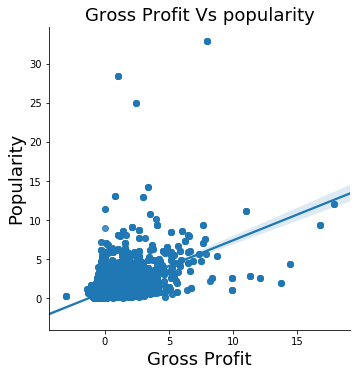

In [62]:
plt.figure(figsize = (12,9));
sns.lmplot(x = 'gross_profit_adj' , y = 'popularity', data = genres_movies);
plt.xlabel('Gross Profit' , fontsize = 18);
plt.ylabel('Popularity', fontsize =18);
plt.title('Gross Profit Vs popularity',fontsize = 18);

### No strong relationship between gross profit & popularity scores.

> ### 4b. Who are the directors contributing to high revenue movies?

In [63]:
movies.groupby('director').sum().sort_values(by = 'gross_profit_adj',ascending = False)['gross_profit_adj'][0:10]

director
Steven Spielberg     75.415245
James Cameron        38.896218
George Lucas         36.586155
Peter Jackson        33.223814
Chris Columbus       24.011957
Michael Bay          22.423694
Robert Zemeckis      22.212452
David Yates          21.074966
Christopher Nolan    18.096205
J.J. Abrams          16.076668
Name: gross_profit_adj, dtype: float64

> ### 4c. What are the production comapnies which were able to make high revenues.

In [64]:
movies_prod_companies = pd.merge(movies,production_companies , how = 'inner', on = 'id')

In [65]:
movies_prod_companies.groupby('production_companies').sum().sort_values(by= 'gross_profit_adj',ascending = False)['gross_profit_adj'][0:10]

production_companies
Twentieth Century Fox Film Corporation    165.347407
Warner Bros.                              144.674475
Universal Pictures                        139.421703
Paramount Pictures                        125.238307
Walt Disney Pictures                      114.197977
Amblin Entertainment                       89.553973
Lucasfilm                                  80.367530
Eon Productions                            59.770813
Heyday Films                               49.038967
DreamWorks SKG                             48.174813
Name: gross_profit_adj, dtype: float64

> ### 4d. What Actors/Actress are able to  make high revenues.

In [66]:
movies_cast = pd.merge(movies,cast,how = 'inner' , on = 'id')

In [67]:
movies_cast.groupby('cast').sum().sort_values(by = 'gross_profit_adj',ascending = False)['gross_profit_adj'][0:10]

cast
Harrison Ford       65.561827
Carrie Fisher       44.211421
Tom Cruise          43.272851
Emma Watson         43.013830
Mark Hamill         42.819847
Rupert Grint        42.017407
Daniel Radcliffe    41.980025
Tom Hanks           40.355791
Ian McKellen        37.654879
Orlando Bloom       35.335510
Name: gross_profit_adj, dtype: float64

<a id='q5'></a>
> ### 5. High Gross profit movies from year to year.

In [68]:
def sort_by_gross_profit(df):
    return df.sort_values(by = 'gross_profit_adj',ascending = False)['original_title'].head(1)


In [69]:
movies.groupby('release_year').apply(sort_by_gross_profit)

release_year       
1960          10143                                        Spartacus
1961          10110                   One Hundred and One Dalmatians
1962          9849                                            Dr. No
1963          10438                            From Russia With Love
1964          9881                                        Goldfinger
1965          10690                               The Sound of Music
1966          10822                  Who's Afraid of Virginia Woolf?
1967          10398                                  The Jungle Book
1968          9719                             2001: A Space Odyssey
1969          10725               Butch Cassidy and the Sundance Kid
1970          10660                                          Airport
1971          9925                              Diamonds Are Forever
1972          7269                                     The Godfather
1973          10594                                     The Exorcist
1974          

<a id='q6'></a>
> ### 6. High Budget Movies from year to year.

In [70]:
def sort_by_budget(df):
    return df.sort_values(by = 'budget_adj',ascending = False)['original_title'].head(1)


In [71]:
movies.groupby('release_year').apply(sort_by_budget)

release_year       
1960          10143                                      Spartacus
1961          10112                                West Side Story
1962          9850                              Lawrence of Arabia
1963          10443                                      Cleopatra
1964          9887                                    My Fair Lady
1965          10691                                 Doctor Zhivago
1966          10824                 The Bible: In the Beginning...
1967          10409                                The Dirty Dozen
1968          9719                           2001: A Space Odyssey
1969          10724                On Her Majesty's Secret Service
1970          10656                              Tora! Tora! Tora!
1971          9931                        Bedknobs and Broomsticks
1972          7269                                   The Godfather
1973          10593                                     Robin Hood
1974          9785                        

<a id='q7'></a>
> ### 7. What are the months when most of the movies released?

In [72]:
movies['release_month'].value_counts()[0:10]

9     852
10    720
12    654
8     622
6     584
7     559
3     542
5     538
4     514
1     505
Name: release_month, dtype: int64

<a id='q8'></a>
> ### 8. As per popularity score which actor / actress is most famous?

In [73]:
movies_cast = pd.merge(movies , cast , how = 'inner' , on= 'id') #Merge movies cast DataFrame on id

In [74]:
movies_cast.groupby('cast').sum().sort_values(by = 'popularity' , ascending = False ).loc[:,'popularity'][0:10]

cast
Samuel L. Jackson     88.144279
Michael Caine         78.459613
Harrison Ford         77.624573
Bruce Willis          74.199843
Brad Pitt             72.921414
Robert De Niro        72.456620
Johnny Depp           69.035061
Scarlett Johansson    67.062965
Tom Hanks             65.203088
Tom Hardy             64.620653
Name: popularity, dtype: float64

<a id='q9'></a>
> ### 9. As per popularity score which movie is most famous?

In [75]:
movies.sort_values(by = 'popularity', ascending = False).loc[:,['popularity','original_title']][0:10]

,popularity,original_title
0,32.985763,Jurassic World
1,28.419936,Mad Max: Fury Road
629,24.949134,Interstellar
630,14.311205,Guardians of the Galaxy
2,13.112507,Insurgent
631,12.971027,Captain America: The Winter Soldier
1329,12.037933,Star Wars
632,11.422751,John Wick
3,11.173104,Star Wars: The Force Awakens
633,10.739009,The Hunger Games: Mockingjay - Part 1


<a id='q10'></a>
> ### 10. As per Average vote score which movie is most famous?

In [76]:
movies.sort_values(by = 'vote_average' ,ascending = False).loc[:,['vote_average','original_title']][0:10]

,vote_average,original_title
609,8.4,The Jinx: The Life and Deaths of Robert Durst
4178,8.4,The Shawshank Redemption
7948,8.4,Stop Making Sense
7269,8.3,The Godfather
9315,8.2,For All Mankind
650,8.2,Whiplash
9758,8.1,The Godfather: Part II
10222,8.1,Schindler's List
5827,8.1,Jodorowsky's Dune
2389,8.1,Bill Cunningham New York


<a id='q11'></a>
> ### 11. As per Average vote score which Actor/Actress is most famous?

In [77]:
movies_cast.sort_values(by = 'vote_average' ,ascending = False).loc[:,['vote_average','cast']][0:10]

,vote_average,cast
23596,8.4,Tina Weymouth
23595,8.4,David Byrne
1641,8.4,Zachary Stuart-Pontier
12059,8.4,Clancy Brown
12058,8.4,William Sadler
12057,8.4,Bob Gunton
12056,8.4,Morgan Freeman
12055,8.4,Tim Robbins
1642,8.4,Lynda Obst
23599,8.4,Steven Scales


<a id='q12'></a>
> ### 12. Movies which have earned highest revenue.

In [78]:
movies.sort_values(by = 'gross_profit_adj',ascending = False).loc[:,['gross_profit_adj', 'original_title']][0:10]

,gross_profit_adj,original_title
1329,17.836808,Star Wars
1386,16.753520,Avatar
5231,14.430144,Titanic
10594,13.725061,The Exorcist
9806,12.076713,Jaws
8889,11.345211,E.T. the Extra-Terrestrial
3,11.019730,Star Wars: The Force Awakens
8094,9.914927,The Net
10110,9.875713,One Hundred and One Dalmatians
7309,8.761110,The Empire Strikes Back


<a id='q13'></a>
> ### 13. Most Frequent Runtime of movies 

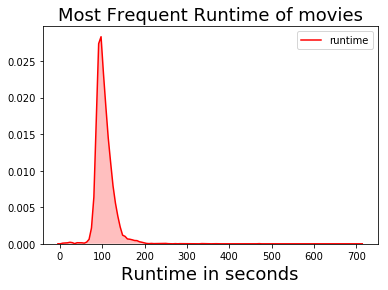

In [79]:
sns.kdeplot(movies['runtime'], shade = True, color = 'r');
plt.xlabel('Runtime in seconds',fontsize = 18);

plt.title('Most Frequent Runtime of movies', fontsize = 18);


### Typically movies have runtime from 90 secs to 150 sec

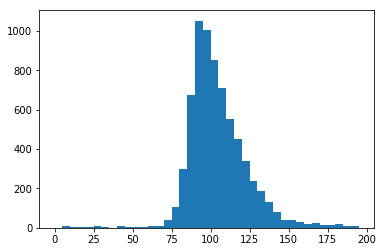

In [80]:
binval = np.arange(0,200,5)
plt.hist(movies['runtime'],bins = binval);


<a id='q14'></a>
> ### 14. Most famous action directors

In [81]:
action=genres_movies[genres_movies['genres'] == 'Action'] #filter dataframe by Action Genre

In [82]:
#Use groupby to sum up by director & then sort by gross profit in descending order 
action.groupby('director').sum().sort_values(by = 'gross_profit_adj',ascending = False)['gross_profit_adj'][0:10]

director
George Lucas         33.499562
Peter Jackson        26.799369
James Cameron        24.774505
Steven Spielberg     21.024806
Michael Bay          20.246891
Roland Emmerich      16.086165
Guy Hamilton         15.677364
Christopher Nolan    15.378070
J.J. Abrams          15.070633
Joss Whedon          13.977467
Name: gross_profit_adj, dtype: float64

<a id='q15'></a>
> ### 15. Most famous Actors in Action genre. 

In [83]:
genres_movies_cast = pd.merge(genres_movies,cast,how = 'inner', on = 'id') #merge dataframe genre_movies & cast

In [84]:
#filter data by Action genere
action_cast=genres_movies_cast[genres_movies_cast['genres'] == 'Action']

In [85]:
#group the data by cast take sum of it & then sort it accoring to popularity score in descending order.
action_cast.groupby('cast').sum().sort_values(by = 'popularity', ascending = False)['popularity'][0:10]

cast
Harrison Ford            61.072100
Samuel L. Jackson        53.610413
Arnold Schwarzenegger    52.866660
Tom Hardy                48.581000
Jason Statham            47.446214
Chris Pratt              47.296968
Chris Evans              46.219419
Orlando Bloom            43.405702
Bruce Willis             42.707748
Scarlett Johansson       42.199309
Name: popularity, dtype: float64

In [86]:
genres_cast = pd.merge(genres,cast, how = 'inner', on = 'id')

<a id='q16'></a>
> ### 16. Which production companies have made most of the movies

In [87]:
movies_prod_companies['production_companies'].value_counts()[0:10]

Warner Bros.                              458
Universal Pictures                        456
Paramount Pictures                        390
Twentieth Century Fox Film Corporation    262
Columbia Pictures                         253
New Line Cinema                           199
Metro-Goldwyn-Mayer (MGM)                 194
Walt Disney Pictures                      159
Touchstone Pictures                       154
Columbia Pictures Corporation             144
Name: production_companies, dtype: int64

<a id='q17'></a>
> ### 17.Most frequent Keywords used in every genres.

In [88]:
movies_key = pd.merge(movies , keywords , how = 'inner' , on = 'id')

### I have merged two DataFrames for answering my question.

In [89]:
genres_keywords = pd.merge(genres , keywords , how = 'inner', on = 'id')

In [90]:
genres_keywords.head(10)

,id,genres,keywords
0,135397,Action,monster
1,135397,Action,dna
2,135397,Action,tyrannosaurus rex
3,135397,Action,velociraptor
4,135397,Action,island
5,135397,Adventure,monster
6,135397,Adventure,dna
7,135397,Adventure,tyrannosaurus rex
8,135397,Adventure,velociraptor
9,135397,Adventure,island



###  Most common keywords used in all the genres

In [91]:
keywords['keywords'].value_counts()[0:10]

based on novel          245
independent film        245
sex                     239
woman director          187
murder                  172
sport                   161
nudity                  135
new york                131
duringcreditsstinger    128
dystopia                127
Name: keywords, dtype: int64

### It would be good idea to the keywords in visualization for better understanding.I will do that in further sections

<a id='q18'></a>
> ### 18. Older or newer movies get more popularity score 

In [92]:
#group data by release year take the median of all the numeric columns
groupby_year=movies.groupby('release_year').median()

In [93]:
#get release year column back into dataframe for visualization
groupby_year['release_year'] = groupby_year.index.get_level_values(0)

<Figure size 936x648 with 0 Axes>

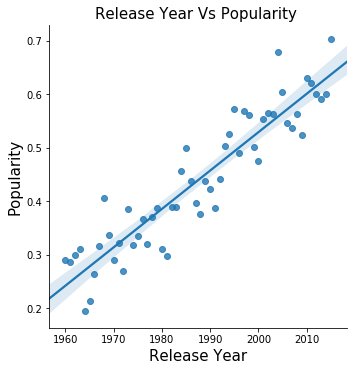

In [94]:
plt.figure(figsize = (13,9)) #set a figure size
sns.lmplot(x = 'release_year', y = 'popularity', data = groupby_year); #plot a lineplot 
#gives names to x-axis , y-axis & the title
plt.xlabel('Release Year', fontsize = 15); 
plt.ylabel('Popularity', fontsize = 15);
plt.title('Release Year Vs Popularity ',fontsize = 15);

### This visulaization clearly shows recent Year movies are more popular than older movies.

<a id='q17'></a>
## Visualization

> ### Plot Most Famous genres over the years

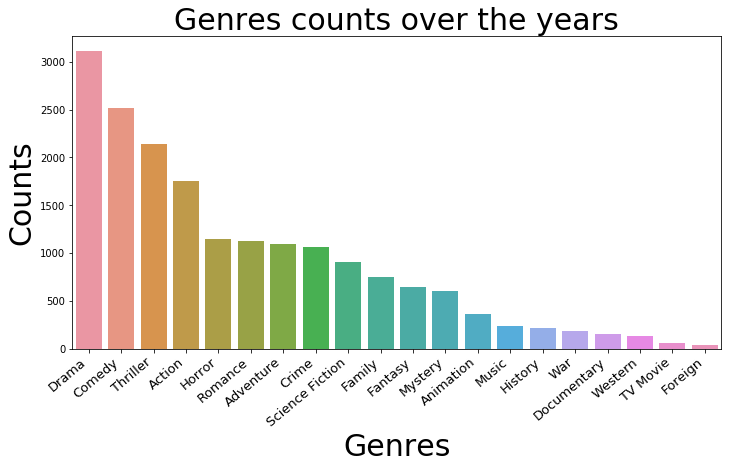

In [95]:
plt.figure(figsize = (10,6)) #set a figure size
ax = sns.countplot(x="genres", data= genres, order = genres['genres'].value_counts().index) #plots bar graph for genres
#rotate x-tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize = 13)
plt.tight_layout()
#gives names to x-axis , y-axis & the title
plt.xlabel('Genres' , fontsize = 30)
plt.ylabel('Counts' , fontsize = 30)
plt.title('Genres counts over the years',fontsize = 30)
plt.show()

### Graph depicts Drama,Comedy,Thriller,Action & Horror are most popular genres over the years. 

#### Using wordcloud

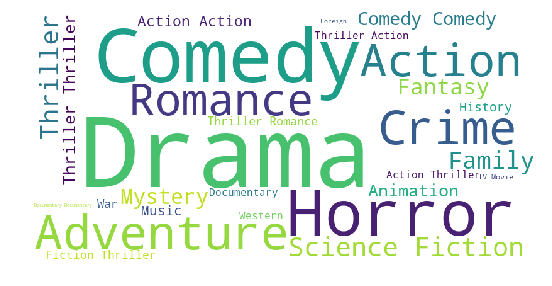

In [96]:
plt.figure(figsize = (9,9))
stopwords = set(STOPWORDS)
tagline_cloud = WordCloud(width=800, height=400,background_color="white",max_words=30,stopwords=stopwords).generate(' '.join(genres['genres']))

# Generate plot

plt.axis("off")
plt.imshow(tagline_cloud)
plt.show()


### We can observe here that the most popular genres are Drama,Comedy, Thriller, Action, Adventure, Romance, Horror.

> ### Most famous movies by popularity score.

In [97]:
movies_sorted_by_popularity = movies.sort_values(by = 'popularity', ascending = False)[0:10]

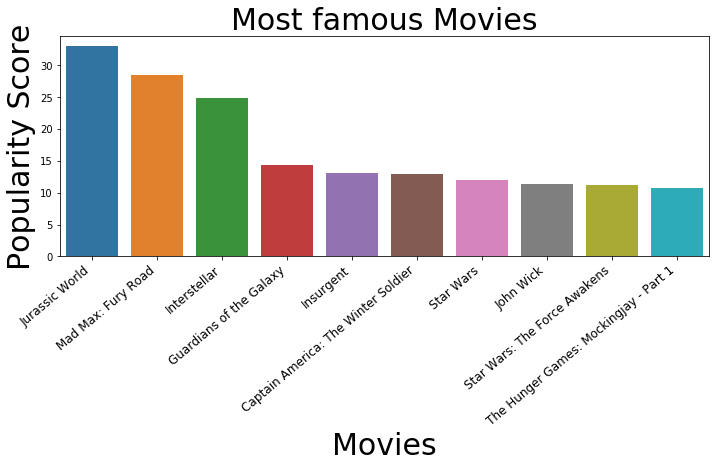

In [98]:
plt.figure(figsize = (10,6)) #set a figure size
ax=sns.barplot(x = 'original_title' , y = 'popularity', data =movies_sorted_by_popularity) #plots bar graph for movies title by popularity
#rotate xtick labels by 40 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize = 12)
plt.tight_layout()
#gives names to x-axis , y-axis & the title
plt.xlabel('Movies' , fontsize = 30)
plt.ylabel('Popularity Score' , fontsize = 30)
plt.title('Most famous Movies',fontsize = 30)
plt.show()

### We can observe Jurassic world is most famous movie as per popularity score

In [99]:
movies_sortedby_popularity = movies.sort_values(by = 'popularity', ascending = False).tail(10)

#### I am considering movies which have got less popularity score are the flop movies.

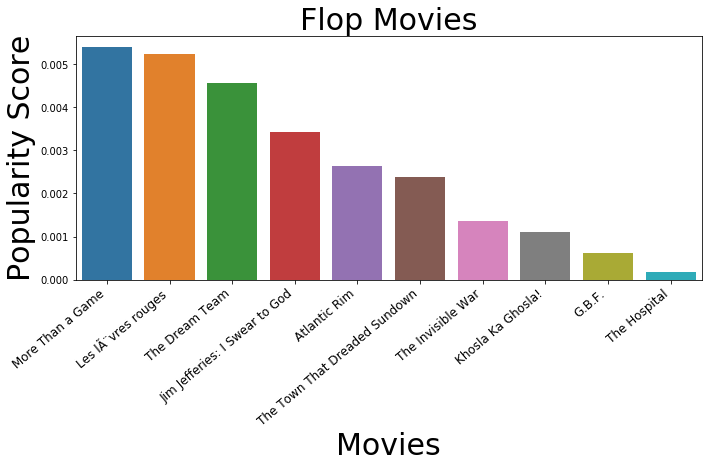

In [100]:
plt.figure(figsize = (10,6))
#plots a bar plot for movie title by popularity score
ax=sns.barplot(x = 'original_title' , y = 'popularity', data =movies_sortedby_popularity)
#rotate Xtick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize = 12)
plt.tight_layout()
plt.xlabel('Movies' , fontsize = 30)
plt.ylabel('Popularity Score' , fontsize = 30)
plt.title('Flop Movies',fontsize = 30)
plt.show()

### We can observe Least popular movie is 'The Hospital'.

> ### Graph for Average votes received by each genres

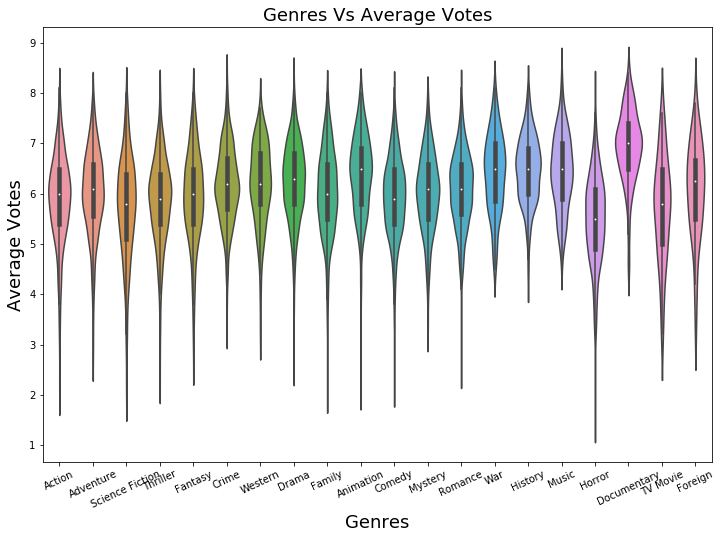

In [101]:
#set a figure size
fig, ax = plt.subplots() 
fig.set_size_inches(12, 8)
sns.violinplot(x = 'genres' , y = 'vote_average' , data =genres_movies);

#gives names to x-axis , y-axis & the title
plt.xlabel('Genres',fontsize = 18);
plt.ylabel('Average Votes',fontsize = 18);
plt.title('Genres Vs Average Votes', fontsize = 18)
plt.xticks(rotation = 25);

### Most common Average vote is from 5 to 7.50.average votes for Documentary lies in between 6.5 to 7.5 which is highest among all the genres & Horror is having most spreadout votes.

> ### Plot a graph for Number of movies released every month

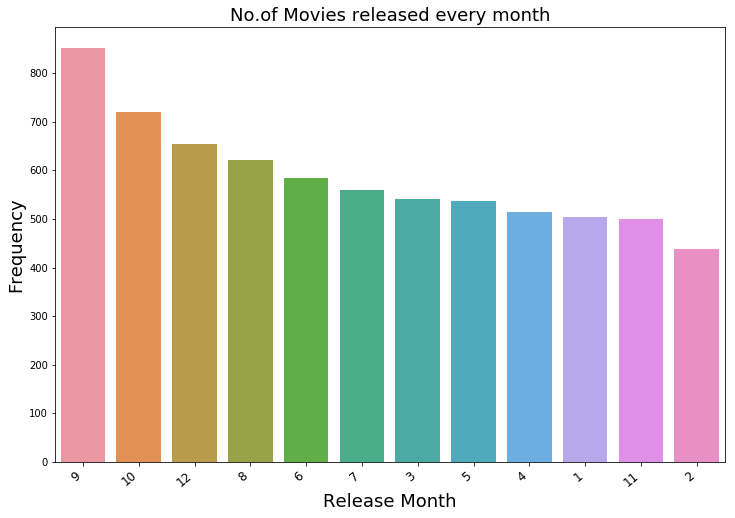

In [102]:
#set a figure size
plt.figure(figsize = (12,8))
#Bar plot for no.of movies released every month
ax=sns.countplot(x = 'release_month', data = movies,order = movies['release_month'].value_counts().index);
#rotate x ticklabels
ax.set_xticklabels(ax.get_xticklabels(),rotation = 40, ha= 'right', fontsize = 12);
#gives names to x-axis , y-axis & the title
plt.xlabel('Release Month', fontsize = 18);
plt.ylabel('Frequency',fontsize = 18);
plt.title('No.of Movies released every month',fontsize = 18);

### Top 5 release months are September,October,December ,August,June

> ### Plot a graph for number of movies released every year

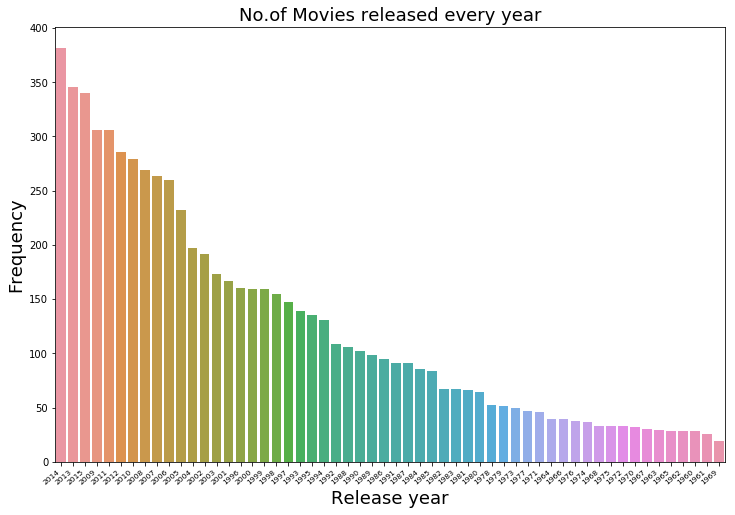

In [103]:
#set a figure size
plt.figure(figsize = (12,8))
#bar plot for no.movies released every year
ax=sns.countplot(x = 'release_year', data = movies, order = movies['release_year'].value_counts().index);
#Rotate xticklabels
ax.set_xticklabels(ax.get_xticklabels(),rotation = 40, ha= 'right', fontsize = 7.6);
#Give label to x-axis,y-axis & a title
plt.xlabel('Release year', fontsize = 18);
plt.ylabel('Frequency',fontsize = 18);
plt.title('No.of Movies released every year',fontsize = 18);

### Maximum released movies are in 2014 followed by 2013,2015,2009,2011 & the lowest is 1969.This graph also gives us an idea that more number of movies have been released over the years.


> ### Graph for High profit earning cast.

In [104]:
#group data frame by cast & sort by gross profit in descending order.
movies_cast_sortedby_grossprofit=movies_cast.groupby('cast').sum().sort_values(by = 'gross_profit_adj' , ascending = False )[0:10]

In [105]:
#get cast column back in dataframe
movies_cast_sortedby_grossprofit['cast'] = movies_cast_sortedby_grossprofit.index.get_level_values(0)

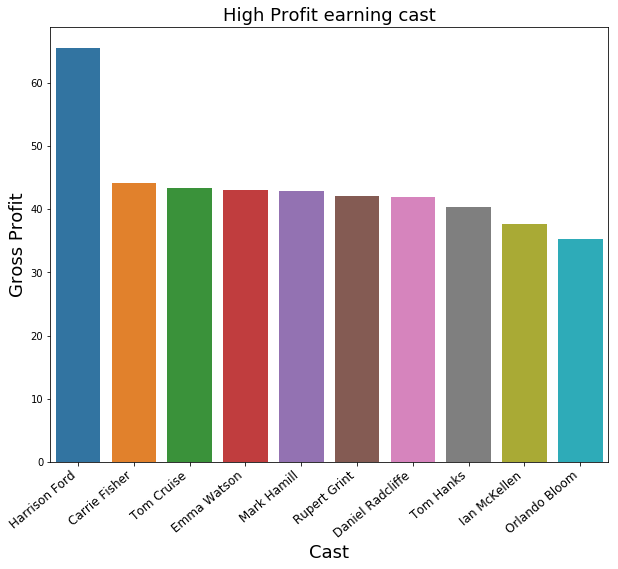

In [106]:
#set figure size
plt.figure(figsize=(10,8))
ab=sns.barplot(x = 'cast', y ='gross_profit_adj',data =movies_cast_sortedby_grossprofit );
#Rotate Xtick labels
ab.set_xticklabels(ab.get_xticklabels(),rotation = 40, ha ='right', fontsize = 12 );
#Give labels to axis
plt.xlabel('Cast', fontsize = 18);
plt.ylabel('Gross Profit', fontsize = 18);
plt.title('High Profit earning cast', fontsize = 18);

### Harrison Ford has made highest gross profit among all.

> ### Plot a graph for Most Famous Actors by Popularity score

In [107]:
#group data frame by cast sort it according to popularity score in descending score
movies_cast_sortedby_popularity=movies_cast.groupby('cast').sum().sort_values(by = 'popularity' , ascending = False )[0:10]

In [108]:
#get cast column back in dataframe 
movies_cast_sortedby_popularity['cast'] = movies_cast_sortedby_popularity.index.get_level_values(0)

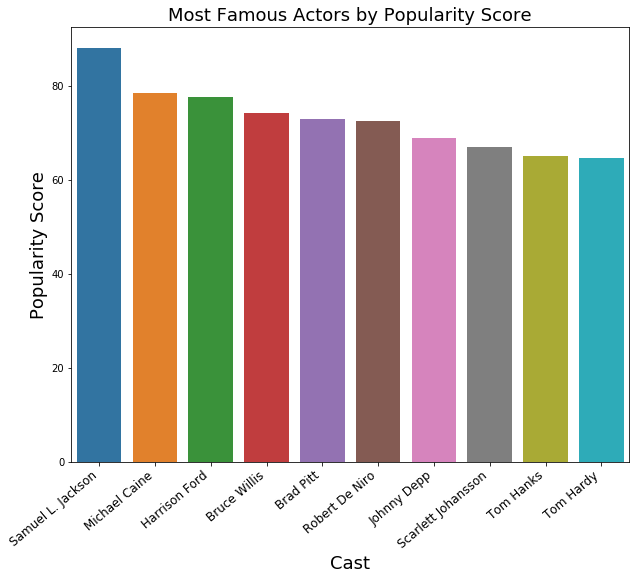

In [109]:
#set figure size
plt.figure(figsize=(10,8))
ab=sns.barplot(x = 'cast', y ='popularity',data =movies_cast_sortedby_popularity );
#Rotate x tick labels
ab.set_xticklabels(ab.get_xticklabels(),rotation = 40, ha ='right', fontsize = 12 );
#Give labels to axis
plt.xlabel('Cast', fontsize = 18);
plt.ylabel('Popularity Score', fontsize = 18);
plt.title('Most Famous Actors by Popularity Score', fontsize = 18);

### Top 3 Most popular actors are Samuel L. Jackson,Micheal Caine, Harrison Ford.

In [110]:
genres_movies_cast.head(1)

,id,original_title,tagline,overview,runtime,release_day,release_month,release_year,popularity,vote_count,vote_average,director,budget,revenue,budget_adj,revenue_adj,gross_profit_adj,genres,cast
0,135397,Jurassic World,The park is open.,Twenty-two years after the events of Jurassic ...,124,Tuesday,6,2015,32.985763,5562,6.5,Colin Trevorrow,150000000,1513528810,2.857555,7.603943,7.951111,Action,Chris Pratt


### As drama is the most popular genre I will try pull the data for actors,directors, production comapnies by popularity score who have done most drama movies.

In [111]:
drama = genres_movies_cast[genres_movies_cast['genres'] == 'Drama']

In [112]:
drama_sorted_by_popularity=drama.groupby('cast').sum().sort_values(by = 'popularity', ascending = False)[0:10]

In [113]:
drama_sorted_by_popularity['cast'] = drama_sorted_by_popularity.index.get_level_values(0)

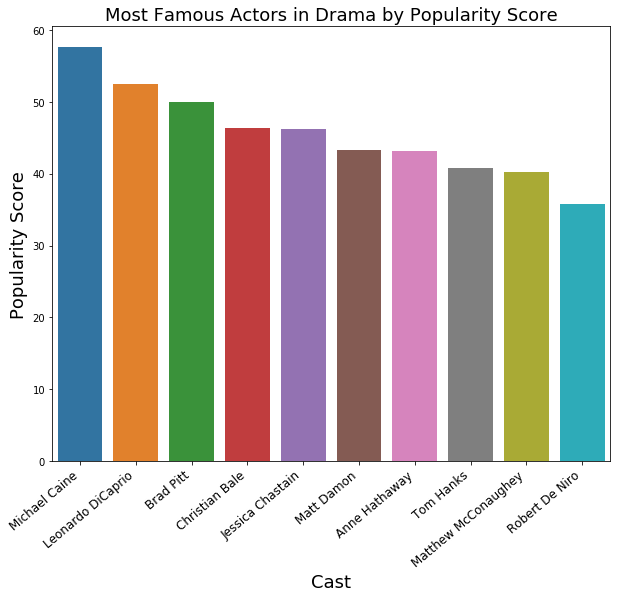

In [114]:
#set figure size
plt.figure(figsize=(10,8))
ab=sns.barplot(x = 'cast', y ='popularity',data= drama_sorted_by_popularity);
#Rotate x tick labels
ab.set_xticklabels(ab.get_xticklabels(),rotation = 40, ha ='right', fontsize = 12 );
#Give labels to axis
plt.xlabel('Cast', fontsize = 18);
plt.ylabel('Popularity Score', fontsize = 18);
plt.title('Most Famous Actors in Drama by Popularity Score', fontsize = 18);

### Top 3 Most Popular Actors in Drama are Micheal Caine, Leonardo DiCaprio, Brad Pitt

In [115]:
sorted_by_popularity=drama.groupby('original_title').sum().sort_values(by = 'popularity', ascending = False)[0:10]

In [116]:
sorted_by_popularity['original_title'] =sorted_by_popularity.index.get_level_values(0)

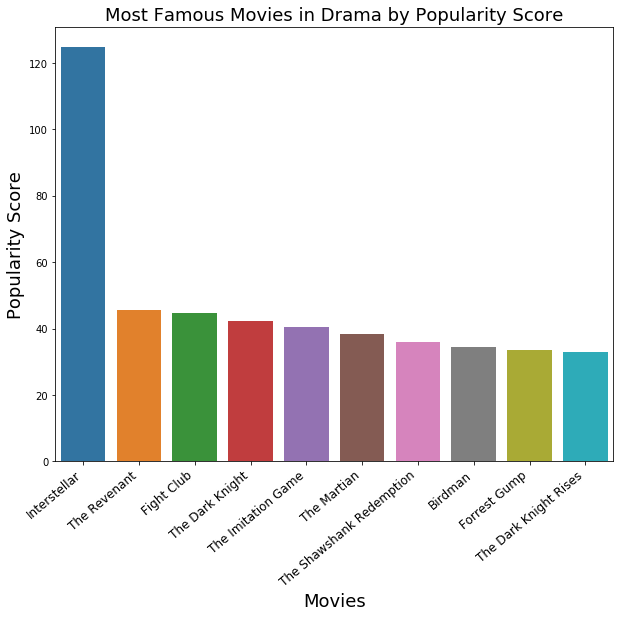

In [117]:
#set figure size
plt.figure(figsize=(10,8))
ab=sns.barplot(x = 'original_title', y ='popularity',data= sorted_by_popularity);
#Rotate Xtick labels
ab.set_xticklabels(ab.get_xticklabels(),rotation = 40, ha ='right', fontsize = 12 );
#Give labels to axis
plt.xlabel('Movies', fontsize = 18);
plt.ylabel('Popularity Score', fontsize = 18);
plt.title('Most Famous Movies in Drama by Popularity Score', fontsize = 18);

### This graph shows Most Popular Movie in Drama is Interstellar

In [118]:
director_sorted_by_popularity=drama.groupby('director').sum().sort_values(by = 'popularity', ascending = False)[0:10]

In [119]:
director_sorted_by_popularity['director'] =director_sorted_by_popularity.index.get_level_values(0)

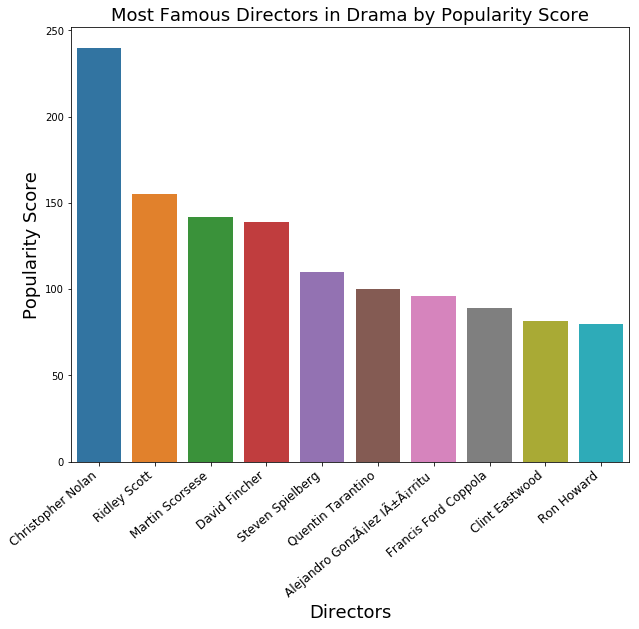

In [120]:
#set figure size
plt.figure(figsize=(10,8))
ab=sns.barplot(x = 'director', y ='popularity',data=director_sorted_by_popularity);
#Rotate xtick labels
ab.set_xticklabels(ab.get_xticklabels(),rotation = 40, ha ='right', fontsize = 12 );
#Give labels to axis
plt.xlabel('Directors', fontsize = 18);
plt.ylabel('Popularity Score', fontsize = 18);
plt.title('Most Famous Directors in Drama by Popularity Score', fontsize = 18);

### Christopher Nolan is Most Popular Director in Drama among all.

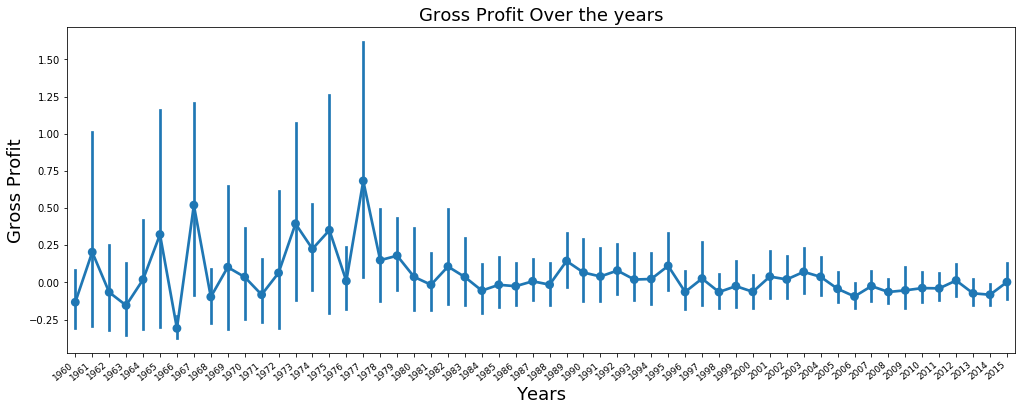

In [121]:
#set figure size
plt.figure(figsize = (17,6))
ag=sns.pointplot(x="release_year", y="gross_profit_adj", data=movies);
#Rotate xtick labels
ag.set_xticklabels(ag.get_xticklabels(), rotation = 40,ha='right', fontsize = 9);
#Give labels to axis
plt.xlabel('Years',fontsize = 18);
plt.ylabel('Gross Profit',fontsize = 18);
plt.title('Gross Profit Over the years',fontsize = 18);

### The year which earned highest profit was 1977 & the year which earned least of all is 1966.

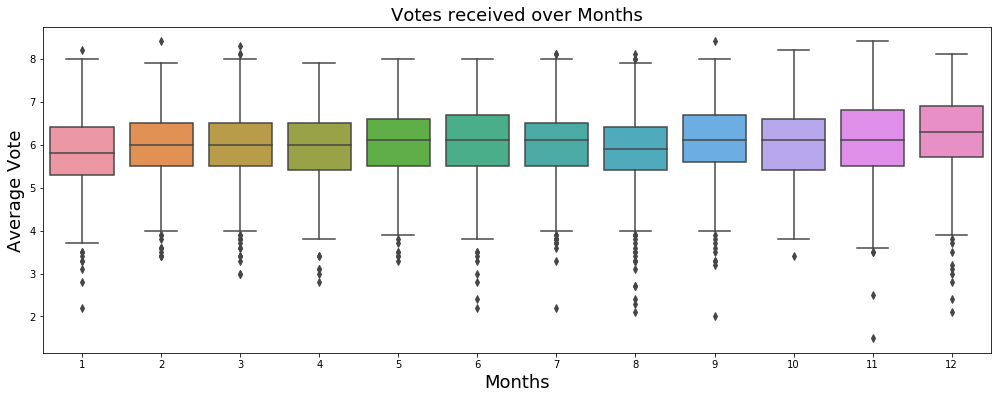

In [122]:
#set a figure size
plt.figure(figsize = (17,6));

sns.boxplot(x = 'release_month', y = 'vote_average' , data = movies);
#Give labels to axis
plt.xlabel('Months',fontsize = 18);
plt.ylabel('Average Vote',fontsize = 18);
plt.title('Votes received over Months',fontsize = 18);

### 75% of the average votes received are from 3.8 to 6.7.In December & January more number of votes has been received.

### As per our analysis top 5 genres are Drama,Comedy,Action,Thriller,Romance. So it would be good idea to find the most used keywords in those genres.

> ### Wordcloud for Most common keywords used in Drama

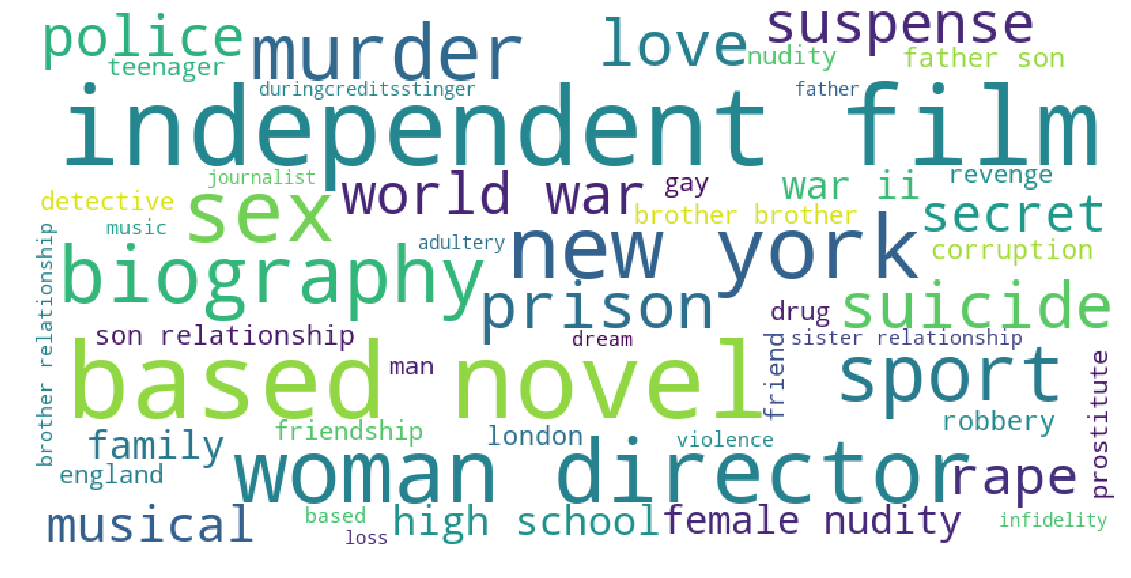

In [123]:
stopwords = set(STOPWORDS)
cloud = WordCloud(width=800, height=400,background_color="white", max_words=50,stopwords=stopwords)
plt.figure( figsize=(20,10) );


positive_cloud = cloud.generate(genres_keywords.loc[genres_keywords['genres'] == 'Drama', 'keywords'].str.cat(sep='\n'));

plt.imshow(positive_cloud);
plt.axis("off");
plt.imshow(cloud);
plt.show();

### Wordcloud shows us independent,novel woman,biography,new york,murder,sex prison,world war,secret are common keywords used in Drama.

> ### Wordcloud for Most common keywords used in Action.

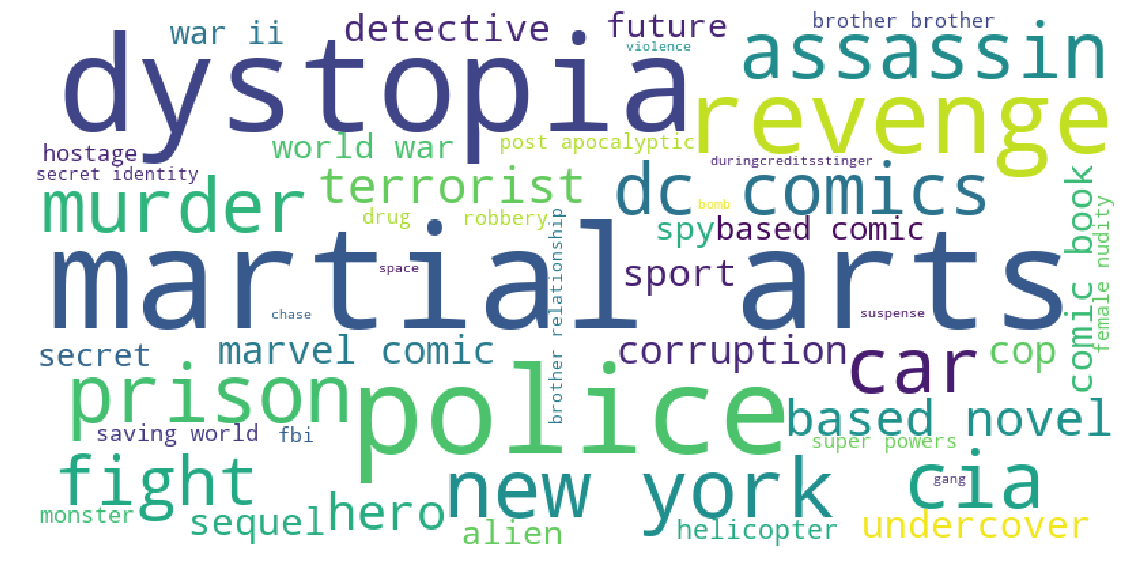

In [124]:
stopwords = set(STOPWORDS)
#set width height background color maximum words on wordcloud
cloud = WordCloud(width=800, height=400,background_color="white", max_words=50,stopwords=stopwords)
#set figure size
plt.figure( figsize=(20,10))
#select Action genre from dataframe,generate a wordcloud of keywords used in action genre
action_cloud = cloud.generate(genres_keywords.loc[genres_keywords['genres'] == 'Action', 'keywords'].str.cat(sep='\n'));

plt.imshow(action_cloud);
#remove axis
plt.axis("off");
plt.imshow(cloud);
plt.show();

### Above wordcloud shows us most commonly used words in Action Genre.

> ### Wordcloud for Most common keywords used in Adventure.

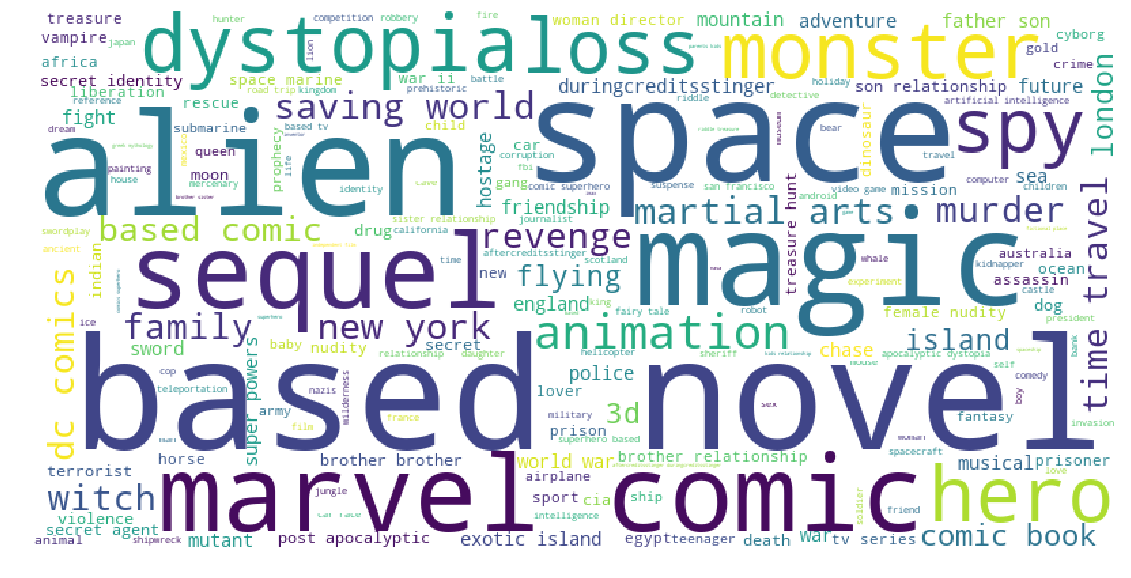

In [125]:
stopwords = set(STOPWORDS)
#set width height background color maximum words on wordcloud
cloud = WordCloud(width=800, height=400,background_color="white",stopwords=stopwords)
#set figure size
plt.figure( figsize=(20,10) );

#select Adventure genre from dataframe,generate a wordcloud of keywords used in adventure genre
adventure_cloud = cloud.generate(genres_keywords.loc[genres_keywords['genres'] == 'Adventure', 'keywords'].str.cat(sep='\n'))

#Generate Plot
plt.imshow(adventure_cloud);
plt.axis("off");
plt.imshow(cloud);
plt.show();

### Most frequently used words in Adventure Genre are Magic,Novel,Space,Alien,dystopia

> ### Most Popular words used in a tagline

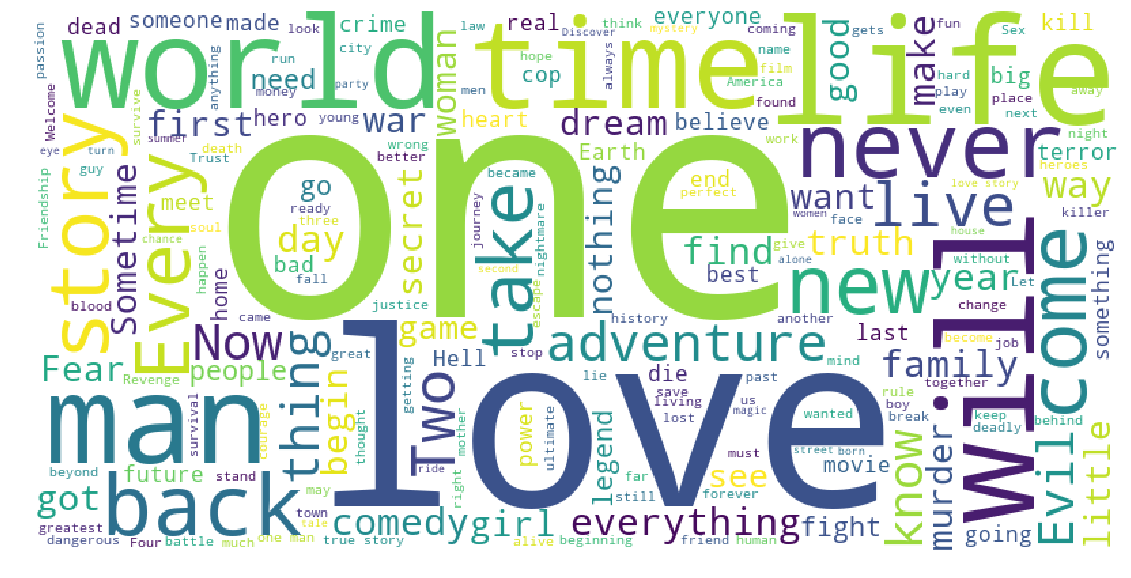

In [126]:
#set width height background color maximum words on wordcloud
plt.figure(figsize = (20,10))
stopwords = set(STOPWORDS)
tagline_cloud = WordCloud(width=800, height=400,background_color="white",stopwords=stopwords).generate(movies['tagline'].str.cat(sep = '\n'))

# Generate plot
plt.axis("off")
plt.imshow(tagline_cloud)
plt.show()


### Above wordcloud shows most frequently used words in tagline

<a id='conclusions'></a>
## Conclusions

> **As per my overall analysis I have found**

**Trend of releasing movies has increased over the years. **

**Frequent Runtimes are from 92 sec to 150 sec**

**Drama,Action,Thriller,Romance,Horror are most popular geners**

**By popularity Score**

> Most Popular Movie is Jurrassic World

> Most Famous Genre is Drama

**Highest gross Profit earned**

>**Director** Steven Spielberg 

>**Movie** Star Wars

>**Cast** Harrison Ford

>**Production Company** Twentieth Century Fox Film Corporation

**By Average Votes**

>**Popular Movie** The Jinx:The Life and Deaths of Robert Durst

>**Popular Cast** Tina Weymouth

**I have found the results of popular movies,popular cast based on popularity score,budget,revenue,average votes received but the analysis could have been more informative if data also has details of awards received by actors or actress**

**Data doesn't contain any information such as movies recommended for kids,providing this data could have been useful to get information about movies,cast & genres which are famous among kids.**

**We can do additional research on Tagline & overview of movies to understand how movies emotion changes according to genres**

**Finally the dataset given to me was of 10886 rows in total but it contained lot of missing values & some movies runtime values,budget,revenue was zero so I had to delete such rows after doing all the cleaning the data left was of 7028 rows that means I lost apprx 3000 rows which would have definitely helped me in my findings if the information it contained wasn't false.** 

In [127]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_TMDb_Dataset.ipynb'])

0